In [590]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from boost_helper_functions import bootstrap, get_estimator_weight, new_sample_weights
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.metrics import geometric_mean_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [591]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv").set_index('id')


# Data Cleaning


In [592]:
df=df.drop(df[df["age"]<10].index)
df=df.drop(df[(df["stroke"]==0)&(df["smoking_status"]=="Unknown")].index)
df=df.drop(df[(df["bmi"].isna()==True)&(df["stroke"]==0)].index)

In [593]:
bmi_null=df[df["bmi"].isna()==True]
bmi_non_null=df[df["bmi"].isna()==False]
bmi_non_null.groupby('ever_married').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
ever_married,,,,,,
No,31.216867,0.051807,0.027711,98.218699,28.285301,0.027711
Yes,54.344000,0.140190,0.071238,111.655650,30.913562,0.070857


In [594]:
def impute_bmi(cols):
    bmi = cols[0]
    ever_married = cols[1]
    
    if pd.isnull(bmi):

        if ever_married == "No":
            return 28.3

        else:
            return 31.0

    else:
        return bmi

In [595]:
df['bmi'] = df[['bmi','ever_married']].apply(impute_bmi,axis=1)

In [596]:
df['ever_married']=df.ever_married.map({'Yes':1,'No':0})
df["Residence_Urban"]=df.Residence_type.map({'Urban':1,'Rural':0})
df["gender_male"]=df.gender.map({'Male':1,'Female':-1,"Other":0})
df.drop(["ever_married","Residence_type","gender"],axis=1,inplace=True)
clean_df = pd.get_dummies(df)


## Data splitting

In [597]:
y = clean_df['stroke']
X = clean_df.drop(columns=["stroke"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.2)

In [ ]:
sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## SGDClassifier

In [700]:
clf1 = SGDClassifier(class_weight = {0: 1, 1:2.7},max_iter=1000, tol=1e-3,random_state=42,)
clf1.fit(X_train_scaled,y_train)
y_pred = clf1.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
print("G_mean:",round(np.sqrt(sensitivity*precision),2))
print('training score:', round(clf1.score(X_train_scaled,y_train),2))
print('testing score:', round(clf1.score(X_test_scaled,y_test),2))
print('testing accuracy:', round(accuracy_score(y_test, y_pred),2))
print('roc_auc_score:',round(roc_auc_score(y_test, y_pred),2))
print('f1_score:',round(f1_score(y_test, y_pred),2))
print("*"*70)
print(classification_report(y_test, y_pred))

G_mean: 0.52
training score: 0.93
testing score: 0.93
testing accuracy: 0.93
roc_auc_score: 0.71
f1_score: 0.51
**********************************************************************
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       637
           1       0.63      0.44      0.51        62

    accuracy                           0.93       699
   macro avg       0.79      0.71      0.74       699
weighted avg       0.92      0.93      0.92       699



## LogisticRegression

In [698]:
clf2 = LogisticRegression(class_weight = {0: 1, 1:3.6},max_iter=1000,random_state=42)
clf2.fit(X_train_scaled,y_train)
y_pred = clf2.predict(X_test_scaled)
y_prob = clf2.predict_proba(X_test_scaled)[:,1]
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
print("G_mean:",round(np.sqrt(sensitivity*precision),2))
print('training score:', round(clf2.score(X_train_scaled,y_train),2))
print('testing score:', round(clf2.score(X_test_scaled,y_test),2))
print('testing accuracy:', round(accuracy_score(y_test, y_pred),2))
print('ROC AUC score:', round(roc_auc_score(y_test, y_prob),2))
print('f1_score:',round(f1_score(y_test, y_pred),2))
print("*"*70)
print(classification_report(y_test, y_pred))


G_mean: 0.52
training score: 0.92
testing score: 0.93
testing accuracy: 0.93
ROC AUC score: 0.89
f1_score: 0.51
**********************************************************************
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       637
           1       0.61      0.44      0.51        62

    accuracy                           0.93       699
   macro avg       0.78      0.70      0.73       699
weighted avg       0.92      0.93      0.92       699



## SVC

In [693]:
clf3 = SVC(C=100,gamma=0.01,kernel='rbf',class_weight = {0: 1, 1:2})
clf3.fit(X_train_scaled, y_train)
y_pred = clf3.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
print("G_mean:",round(np.sqrt(sensitivity*precision),2))
print('training score:', round(clf3.score(X_train_scaled,y_train),2))
print('testing score:', round(clf3.score(X_test_scaled,y_test),2))
print('testing accuracy:', round(accuracy_score(y_test, y_pred),2))
print('roc_auc_score:',round(roc_auc_score(y_test, y_pred),2))
print('f1_score:',round(f1_score(y_test, y_pred),2))
print("*"*70)
print(classification_report(y_test, y_pred))


G_mean: 0.43
training score: 0.95
testing score: 0.93
testing accuracy: 0.93
roc_auc_score: 0.62
f1_score: 0.37
**********************************************************************
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       637
           1       0.75      0.24      0.37        62

    accuracy                           0.93       699
   macro avg       0.84      0.62      0.66       699
weighted avg       0.91      0.93      0.91       699



## KNN

k: 1, Train/Test Score: 1.000/0.888
G_mean: 0.29329423004270655
k: 3, Train/Test Score: 0.949/0.924
G_mean: 0.4237017130659008
k: 5, Train/Test Score: 0.948/0.926
G_mean: 0.40730653998127836
k: 7, Train/Test Score: 0.946/0.930
G_mean: 0.4579054698896255
k: 9, Train/Test Score: 0.947/0.930
G_mean: 0.4579054698896255
k: 11, Train/Test Score: 0.946/0.928
G_mean: 0.43994134506405985
k: 13, Train/Test Score: 0.946/0.928
G_mean: 0.43994134506405985
k: 15, Train/Test Score: 0.946/0.928
G_mean: 0.43994134506405985
k: 17, Train/Test Score: 0.946/0.928
G_mean: 0.43994134506405985
k: 19, Train/Test Score: 0.946/0.928
G_mean: 0.43994134506405985


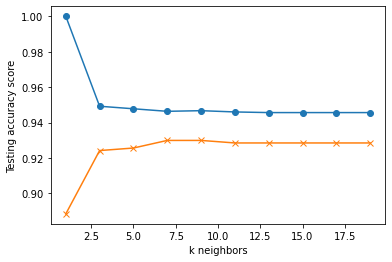

In [604]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=k))
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    y_pred = knn.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp)
    sensitivity = tp / (tp + fn)
    print("G_mean:",np.sqrt(sensitivity*precision))
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [691]:
model=KNeighborsClassifier(n_neighbors=7)
resample=RandomUnderSampler(sampling_strategy = .5,random_state=1, replacement=True)
#Define pipeline
clf4=Pipeline(steps=[('r', resample), ('m', model)])
clf4.fit(X_train_scaled,y_train)
y_prob = clf4.predict_proba(X_test_scaled)[:,1]
y_pred = clf4.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
print("G_mean:",round(np.sqrt(sensitivity*precision),2))
print('training score:', round(clf4.score(X_train_scaled,y_train),2))
print('testing score:', round(clf4.score(X_test_scaled,y_test),2))
print('ROC AUC score:', round(roc_auc_score(y_test, y_prob),2))
print('f1_score:',round(f1_score(y_test, y_pred),2))
print("*"*70)
print(classification_report(y_test, y_pred))

G_mean: 0.39
training score: 0.86
testing score: 0.84
ROC AUC score: 0.79
f1_score: 0.37
**********************************************************************
              precision    recall  f1-score   support

           0       0.95      0.86      0.91       637
           1       0.28      0.55      0.37        62

    accuracy                           0.84       699
   macro avg       0.62      0.71      0.64       699
weighted avg       0.89      0.84      0.86       699



## Decision Trees

In [690]:
clf5 = DecisionTreeClassifier(random_state=48,class_weight = {0: 1, 1:2.4})
clf5.fit(X_train,y_train)
y_prob = clf5.predict_proba(X_test)[:,1]
y_pred = clf5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
print("G_mean:",round(np.sqrt(sensitivity*precision),2))
print('training score:', round(clf5.score(X_train,y_train),2))
print('testing score:', round(clf5.score(X_test,y_test),2))
print('ROC AUC score:', round(roc_auc_score(y_test, y_prob),2))
print('f1_score:',round(f1_score(y_test, y_pred),2))
print("*"*70)
print(classification_report(y_test, y_pred))

G_mean: 0.37
training score: 1.0
testing score: 0.91
ROC AUC score: 0.64
f1_score: 0.37
**********************************************************************
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       637
           1       0.45      0.31      0.37        62

    accuracy                           0.91       699
   macro avg       0.69      0.64      0.66       699
weighted avg       0.89      0.91      0.90       699



## ExtraTreesClassifier


In [689]:
clf6 = ExtraTreesClassifier(random_state=42, n_estimators=110)
clf6.fit(X_train,y_train)
y_prob = clf6.predict_proba(X_test)[:,1]
y_pred = clf6.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
print("G_mean:",round(np.sqrt(sensitivity*precision),2))
print('training score:', round(clf6.score(X_train,y_train),2))
print('testing score:', round(clf6.score(X_test,y_test),2))
print('ROC AUC score:', round(roc_auc_score(y_test, y_prob),2))
print('f1_score:',round(f1_score(y_test, y_pred),2))
print("*"*70)
print(classification_report(y_test, y_pred))

G_mean: 0.38
training score: 1.0
testing score: 0.92
ROC AUC score: 0.82
f1_score: 0.33
**********************************************************************
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       637
           1       0.64      0.23      0.33        62

    accuracy                           0.92       699
   macro avg       0.78      0.61      0.65       699
weighted avg       0.90      0.92      0.90       699



## AdaBoostClassifier

In [688]:
clf7 = AdaBoostClassifier(random_state=1, n_estimators=110, base_estimator=DecisionTreeClassifier(random_state=48,class_weight = {0: 1, 1:1.27})).fit(X_train, y_train)
y_prob = clf7.predict_proba(X_test)[:,1]
y_pred = clf7.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
print("G_mean:",round(np.sqrt(sensitivity*precision),2))
print('training score:', round(clf7.score(X_train,y_train),2))
print('testing score:', round(clf7.score(X_test,y_test),2))
print('ROC AUC score:', round(roc_auc_score(y_test, y_prob),2))
print('f1_score:',round(f1_score(y_test, y_pred),2))
print("*"*70)
print(classification_report(y_test, y_pred))

G_mean: 0.32
training score: 1.0
testing score: 0.88
ROC AUC score: 0.62
f1_score: 0.32
**********************************************************************
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       637
           1       0.33      0.31      0.32        62

    accuracy                           0.88       699
   macro avg       0.63      0.62      0.63       699
weighted avg       0.88      0.88      0.88       699



## Random Forests

In [686]:
clf8 = RandomForestClassifier(random_state=42, n_estimators=20,class_weight = {0: 1, 1:2.4}) 
clf8.fit(X_train, y_train)
y_prob = clf8.predict_proba(X_test)[:,1]
y_pred = clf8.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
print("G_mean:",round(np.sqrt(sensitivity*precision),2))
print('training score:', round(clf8.score(X_train,y_train),2))
print('testing score:', round(clf8.score(X_test,y_test),2))
print('ROC AUC score:', round(roc_auc_score(y_test, y_prob),2))
print('f1_score:',round(f1_score(y_test, y_pred),2))

print("*"*70)
print(classification_report(y_test, y_pred))

G_mean: 0.38
training score: 0.99
testing score: 0.92
ROC AUC score: 0.81
f1_score: 0.31
**********************************************************************
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       637
           1       0.75      0.19      0.31        62

    accuracy                           0.92       699
   macro avg       0.84      0.59      0.63       699
weighted avg       0.91      0.92      0.90       699



## XGBClassifier

In [685]:
clf9 =  XGBClassifier(random_state=1, eval_metric= 'error', learning_rate= 0.004) 
clf9.fit(X_train, y_train)
y_prob = clf9.predict_proba(X_test)[:,1]
y_pred = clf9.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
print("G_mean:",round(np.sqrt(sensitivity*precision),2))
print('training score:', round(clf9.score(X_train,y_train),2))
print('testing score:', round(clf9.score(X_test,y_test),2))
print('ROC AUC score:', round(roc_auc_score(y_test, y_prob),2))
print('f1_score:',round(f1_score(y_test, y_pred),2))
print("*"*70)
print(classification_report(y_test, y_pred))

G_mean: 0.42
training score: 0.95
testing score: 0.93
ROC AUC score: 0.86
f1_score: 0.32
**********************************************************************
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       637
           1       0.92      0.19      0.32        62

    accuracy                           0.93       699
   macro avg       0.93      0.60      0.64       699
weighted avg       0.93      0.93      0.90       699



## MLPClassifier

In [684]:
clf10 =MLPClassifier(solver='lbfgs',max_iter=2000, alpha=0.0001,hidden_layer_sizes=(3,2), random_state=42)

clf10.fit(X_train_scaled, y_train)
y_prob = clf10.predict_proba(X_test_scaled)[:,1]
y_pred = clf10.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
print("G_mean:",round(np.sqrt(sensitivity*precision),2))
print('training score:', round(clf10.score(X_train_scaled,y_train),2))
print('testing score:', round(clf10.score(X_test_scaled,y_test),2))
print('ROC AUC score:', round(roc_auc_score(y_test, y_prob),2))
print('f1_score:',round(f1_score(y_test, y_pred),2))
print("*"*70)
print(classification_report(y_test, y_pred))

G_mean: 0.48
training score: 0.95
testing score: 0.93
ROC AUC score: 0.84
f1_score: 0.37
**********************************************************************
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       637
           1       1.00      0.23      0.37        62

    accuracy                           0.93       699
   macro avg       0.96      0.61      0.67       699
weighted avg       0.94      0.93      0.91       699

